In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
import scipy.stats as st




In [23]:
num_of_teams = 18 
max_wins = 22 
max_losses = 22
max_scores = 2000 
min_marks = 1000 
min_intercepts = 1000

In [24]:
np.random.seed(0)
wins = np.random.randint(0, max_wins + 1, num_of_teams)
scores = np.random.randint(0, max_scores + 1, num_of_teams)
marks = np.random.randint(0, min_marks + 1, num_of_teams)
intercepts = np.random.randint(0, min_intercepts + 1, num_of_teams)

In [25]:
teams = [f"Team_{i+1}" for i in range(num_of_teams)]

data = { 'Team': teams,      # to create a dict of all the arrays created for each of the variables
        "Wins": wins,
        "Scores": scores,
        "Marks": marks,
        "Intercepts" : intercepts}       
df = pd.DataFrame(data)         # to create the dataframe for the synthesised data
df = df.replace('X', np.nan)    # to replace the "x" values in menstrual cycle stage with Nan for analytical purposes [11]
pd.set_option('display.max_rows', None) # to display all the rows of the df in the output cell in the Jupyter notebook 
                                        # https://dev.to/chanduthedev/how-to-display-all-rows-from-data-frame-using-pandas-dha
df = df.sample(frac = 1)        # to randomly shuffle the dataset
df

,Team,Wins,Scores,Marks,Intercepts
10,Team_11,18,755,639,550
8,Team_9,19,115,265,53
13,Team_14,12,1455,714,273
16,Team_17,7,99,675,617
4,Team_5,3,845,910,802
5,Team_6,3,72,423,128
12,Team_13,6,1871,543,756
11,Team_12,4,1733,544,488
0,Team_1,12,1624,755,459
2,Team_3,21,1701,659,183


In [26]:
def calculate_mode(arr):
    unique, counts = np.unique(arr, return_counts=True)
    mode_index = np.argmax(counts)
    return unique[mode_index]

wins_mode = calculate_mode(data['Wins'])
scores_mode = calculate_mode(data['Scores'])

wins_median = np.median(data['Wins'])
scores_median = np.median(data['Scores'])

wins_skew = skew(data['Wins'])
scores_skew = skew(data['Scores'])

# Create a DataFrame for the statistics
statistics = pd.DataFrame({
    'Statistic': ['Mode', 'Median', 'Skewness'],
    'Wins': [wins_mode, wins_median, wins_skew],
    'Scores': [scores_mode, scores_median, scores_skew]
})

# Set the 'Statistic' column as the index
statistics.set_index('Statistic', inplace=True)

# Display the DataFrame
print(statistics)


               Wins      Scores
Statistic                      
Mode       3.000000   72.000000
Median     8.000000  849.500000
Skewness   0.291768    0.054526


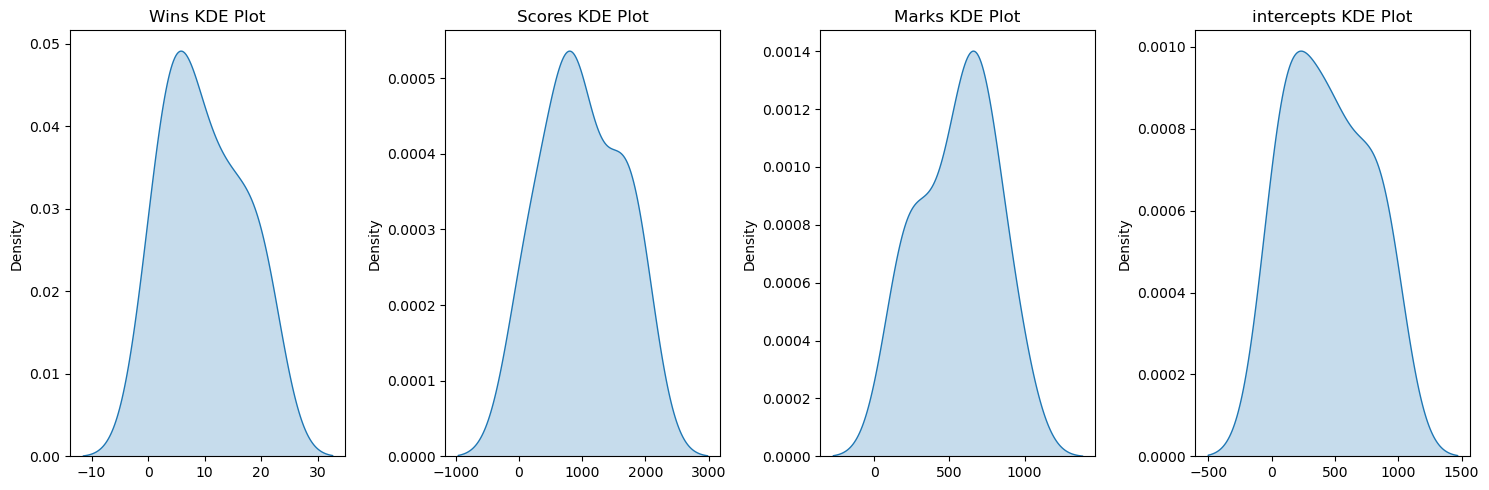

In [53]:
def plot_distributions(data):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    sns.kdeplot(data['Wins'], fill=True)
    plt.title('Wins KDE Plot')

    plt.subplot(1, 4, 2)
    sns.kdeplot(data['Scores'], fill=True)
    plt.title('Scores KDE Plot')

    plt.subplot(1, 4, 3)
    sns.kdeplot(data['Marks'], fill=True)
    plt.title('Marks KDE Plot')
    
    plt.subplot(1, 4, 4)
    sns.kdeplot(data['Intercepts'], fill=True)
    plt.title('intercepts KDE Plot')

    plt.tight_layout()
    plt.show()

# Call the function to plot the distributions
plot_distributions(data)

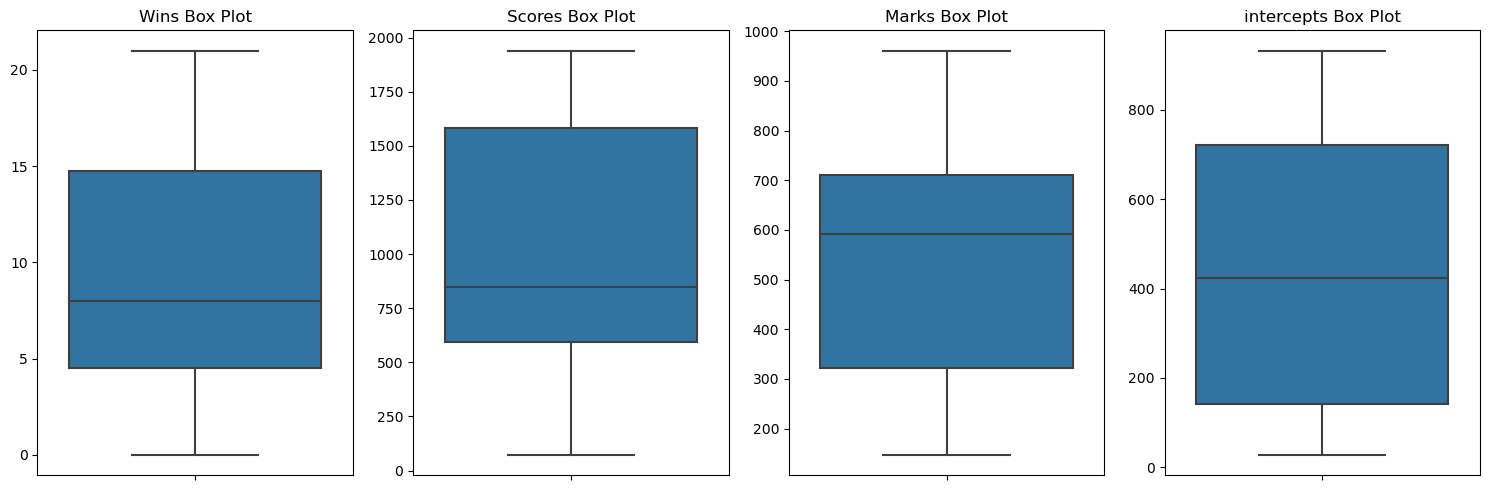

In [54]:
def plot_boxplots(data):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    sns.boxplot(y=data['Wins'])
    plt.title('Wins Box Plot')

    plt.subplot(1, 4, 2)
    sns.boxplot(y=data['Scores'])
    plt.title('Scores Box Plot')

    plt.subplot(1, 4, 3)
    sns.boxplot(y=data['Marks'])
    plt.title('Marks Box Plot')
    
    plt.subplot(1, 4, 4)
    sns.boxplot(y=data['Intercepts'])
    plt.title('intercepts Box Plot')

    plt.tight_layout()
    plt.show()

plot_boxplots(data)




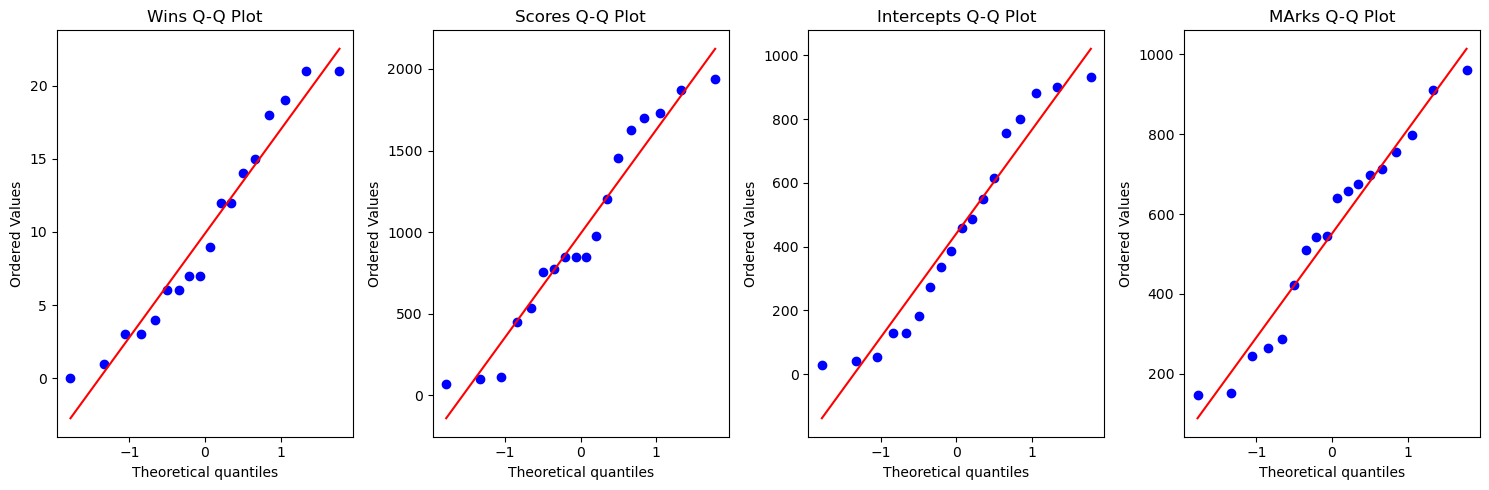

In [55]:
def plot_qq_plots(data):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    stats.probplot(data['Wins'], dist="norm", plot=plt)
    plt.title('Wins Q-Q Plot')

    plt.subplot(1, 4, 2)
    stats.probplot(data['Scores'], dist="norm", plot=plt)
    plt.title('Scores Q-Q Plot')

  
    
    plt.subplot(1, 4, 3)
    stats.probplot(data['Intercepts'], dist="norm", plot=plt)
    plt.title('Intercepts Q-Q Plot')
    
    plt.subplot(1, 4, 4)
    stats.probplot(data['Marks'], dist="norm", plot=plt)
    plt.title('MArks Q-Q Plot')



    plt.tight_layout()
    plt.show()

plot_qq_plots(data)

In [56]:
wins_normality = shapiro(data['Wins'])
scores_normality = shapiro(data['Scores'])
marks_normality = shapiro(data['Marks'])
intercepts_normality = shapiro(data['Intercepts'])

print(f"Wins Normality Test: {wins_normality}")
print(f"Scores Normality Test: {scores_normality}")
print(f"Marks Normality Test: {marks_normality}")
print(f"Intercepts Normality Test: {intercepts_normality}")

Wins Normality Test: ShapiroResult(statistic=0.9347964525222778, pvalue=0.23561379313468933)
Scores Normality Test: ShapiroResult(statistic=0.9321649670600891, pvalue=0.21194890141487122)
Marks Normality Test: ShapiroResult(statistic=0.9484635591506958, pvalue=0.40142664313316345)
Intercepts Normality Test: ShapiroResult(statistic=0.919364869594574, pvalue=0.1259666085243225)


In [57]:
def get_best_distribution(data):
    dist_names = ["norm", 
                  "exponweib",
                  "pareto", 
                  "weibull_max", 
                  "weibull_min",
                  "skewnorm",
                  "norminvgauss",
                  "powernorm",
                  "uniform"]
    
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print(" ")
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

In [59]:
get_best_distribution(data['Wins'])


p value for norm = 0.6345194645475507
p value for exponweib = 0.6322875326755415
p value for pareto = 1.0938888331180155e-05
p value for weibull_max = 5.496238025205176e-06
p value for weibull_min = 0.9228685785557863
p value for skewnorm = 0.8839952714059371
p value for norminvgauss = 0.8969045510840921
p value for powernorm = 0.824249018111317
p value for uniform = 0.6400919785075543
 
Best fitting distribution: weibull_min
Best p value: 0.9228685785557863
Parameters for the best fit: (1.5486201735130156, -0.7265783677530726, 11.751506080367786)


In [60]:
get_best_distribution(data['Scores'])


p value for norm = 0.7661991346787845
p value for exponweib = 0.7998376535087821
p value for pareto = 3.663747499111586e-05
p value for weibull_max = 5.4117991210922335e-12
p value for weibull_min = 0.8993092996669723
p value for skewnorm = 0.7680930748184552
p value for norminvgauss = 0.7786422380944984
p value for powernorm = 0.904951195315674
p value for uniform = 0.8018128322333367
 
Best fitting distribution: powernorm
Best p value: 0.904951195315674
Parameters for the best fit: (5.635526973897639e-05, -165.49256088416746, 6.921332220201858)


In [61]:
get_best_distribution(data['Marks'])


p value for norm = 0.8209471349070268
p value for exponweib = 0.8472888183445275
p value for pareto = 5.028378466388397e-05
p value for weibull_max = 5.833194285068808e-11
p value for weibull_min = 0.8197982858962598
p value for skewnorm = 0.8628997328218517
p value for norminvgauss = 0.8589469838148404
p value for powernorm = 0.8445802074187727
p value for uniform = 0.9568841281580808
 
Best fitting distribution: uniform
Best p value: 0.9568841281580808
Parameters for the best fit: (147.0, 814.0)


In [62]:
get_best_distribution(data['Intercepts'])

p value for norm = 0.8694076011581376
p value for exponweib = 0.004895965896795307
p value for pareto = 2.9046286348357734e-05
p value for weibull_max = 3.789590259287475e-10
p value for weibull_min = 0.38409755597920336
p value for skewnorm = 0.8940990494022626
p value for norminvgauss = 0.8694880129180953
p value for powernorm = 0.7985035224677457
p value for uniform = 0.6365449392829643
 
Best fitting distribution: skewnorm
Best p value: 0.8940990494022626
Parameters for the best fit: (34435282.28608429, 27.999923656798988, 515.4565551285357)
